<a href="https://colab.research.google.com/github/TatanPerez/Senales_Sistemas/blob/main/SenalesSistemas/Parciales/Simulaciones_parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Componentes de simulacion primer parcial


Wilmer Sebastian perez Cuastumal

Universidad Nacional de Colombia

Sede Manizales

2024-1


## Preguntas

### **a.**
La distancia media entre dos senales periodicas
$x_1(t) ∈ R, C$  y  $x_2(t) ∈ R, C$; se puede expresar a
partir de la potencia media de la diferencia entre ellas:

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt.
$$
8

Sea $x_1(t)$ y $x_2(t)$ dos senales como se muestra a continuacion:

$x_1(t) = Ae^jw_0 t$    y  $x_2(t) = Be^j5w0t$
con $w_0 =2πT; T, A, B ∈ R^+$. Determine la distancia entre
las dos señales.

In [147]:
from sympy import *

# Definir los simbolos y constantes
t,wo,To = symbols('t wo To', Real = True)
A, B, T = symbols('A B T', Real = True)#, nonzero = True, nonnegative = True)
# Definimos las señales
x1 = A*exp(1j*wo*t)
x2 = B*exp(5j*wo*t)
x3 = x1*x2
w=(2*pi)/To
x1
x2

B*exp(5.0*I*t*wo)

In [53]:
# Distribuimos la ecuacion de limites he integral por partes como se desarrollo a mano
p1= limit(integrate((x1)**2, (t, 0, T)) /T, T,oo)
p2= -2*limit(integrate((x3), (t, 0, To))/T,T,oo)
p3= limit(integrate((x2)**2, (t, 0, T))/T,T,oo)
D=p1+p2+p3
print("La distancia entre las dos señales es: ",D)


La distancia entre las dos señales es:  A**2 + B**2


#### **b.**
Cual es la señales obtenida en tiempo discreto al utilizar un
conversor analogo digital con frecuencia de muestreo de
$5kHz$, aplicado a la señal continua  $x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)$?. Realizar la simulacion
del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe implemente un conversor
adecuado para la señal estudiada.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# Parametros de la señal x(t) del ejercicio
A= 3
B= 5
C= 10
w1= 1000*np.pi
w2= 2000*np.pi
w3= 11000*np.pi
# Datos con solucion manual
T1= 2*np.pi/w1
T2= 2*np.pi/w2
T3= 2*np.pi/w3
F1= 1/T1
F2= 1/T2
F3= 1/T3
T= T1
ti= 0
tf= 2*T
fs= 5000    # fs proporcionada por el ejercicio la cual no cumple Nyquist
# Definir vector tiempo
tv1= np.arange(ti,tf,1/fs)
# Señal continua definida
xv1= A*np.cos(w1*tv1)+B*np.sin(w2*tv1)+C*np.cos(w3*tv1)


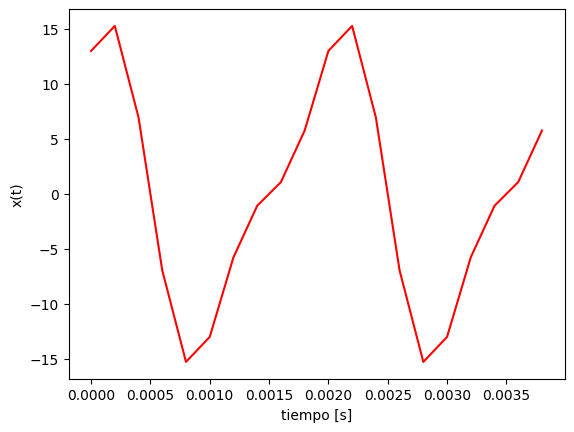

In [80]:
# Simulacion de la señal discretizada con fs = 5kHz proporcionada en el ejercicio
plt.plot(tv1,xv1,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

La señal anterior no cumple con Nyquist a $5kHz$, por lo tanto el conversor no es apropiado y se necerita una frecuencia por lo minimo de $11kHz$ segun Nyquist.

Ahora cambiaremos la frecuencia $f_s=110kHz$ para que dea 20 veces mayor que la frecuencia mayor en las señales de $x(t)$ y asi cumplir con Nyquist con el objetivo de tener una discretizacion apropiada.

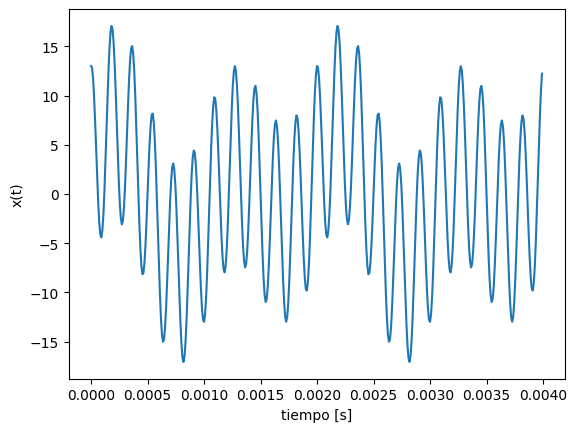

In [75]:
# Incrementamos fs=20F(Max)  : F(Max)=f3
fs= 20*F3
tv2=np.arange(ti,tf,1/fs)  # Nuevo vector de tiempo
xv2= A*np.cos(w1*tv2)+B*np.sin(w2*tv2)+C*np.cos(w3*tv2)
plt.plot(tv2,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

A continuacion podemos observar la gran diferencia al utilizar una frecuencia de muestreo no apropiada. esto nos indica una perdida de señal ya que genera una distorcion

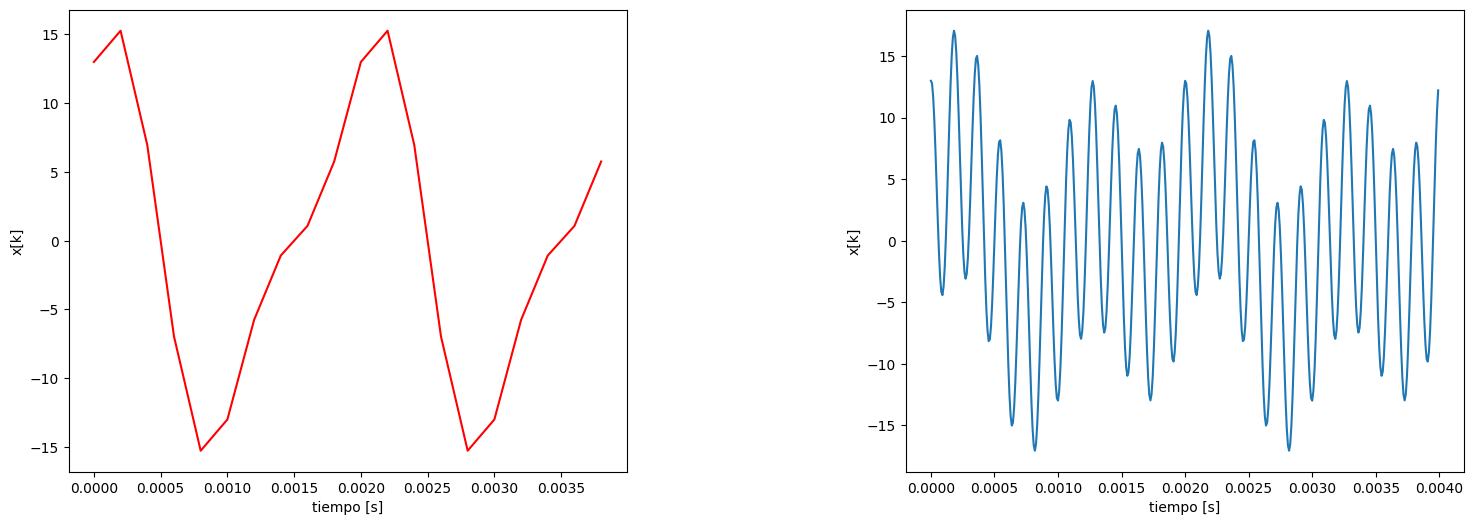

In [81]:
plt.figure(figsize=(18, 6))  # Ancho = 12 pulgadas, Alto = 6 pulgadas
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv1,xv1,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('x[k]')

plt.subplot(122)
plt.plot(tv2,xv2)
plt.xlabel('tiempo [s]')
plt.ylabel('x[k]')
plt.subplots_adjust(hspace=0.2,wspace=0.5)
plt.show()


##### **c.**
Implemente una simulacion para encontrar la salida del sistema lineal e invariante al tiempo $H${ · }, con respuesta al
escalon

$hϵ[n] = ${ 2, 4, 1, 5, 0, 10 },$ n ∈ Z$, ante la entrada
analoga en corriente $x(t) = 20(cos(t/3) + cos(t/4)) [A]$.
A: Amperios. Incluya los acondicionamientos necesarios de
discretizacion y cuantizacion, asumiendo un microprocesador de 4 bits con entrada analoga de $4mA$ a $20mA$

In [88]:
# Función cero y pendiente
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

Primero se busca el $T$ para la señal $x(t)$ y poder discretizar. En este caso tenemos un $T=24π$  que se obtiene en los calculos manuales.

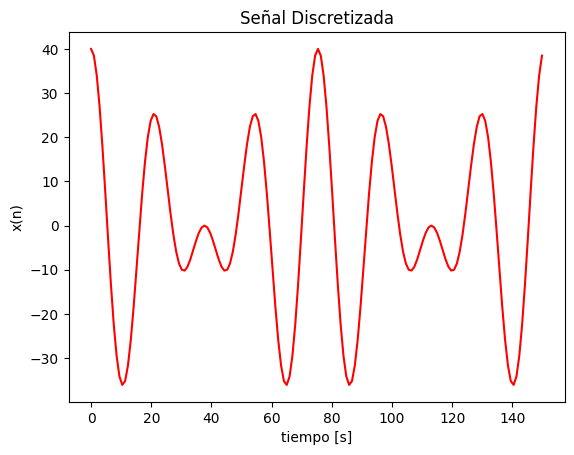

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# Parametros de la señal x(t) del ejercicio
A=20
w1=1/3
w2=1/4
# Datos para discretizar con parametros
T1=2*np.pi/w1
T2=2*np.pi/w2
F1=1/T1
F2=1/T2
ti=0
T=24*np.pi # perido cuasiperiódica
tf=2*T
Fs = 20*max(F1,F2)  # #frecuencia muestreo 20 veces mayor que Fmax para tener un muestreo optimo
tv=np.arange(ti,tf,1/Fs) # Vector tiempo o de muestreo
xv=A*(np.cos(tv/3)+np.cos(tv/4))  # Señal discretizada
y=xv

# Grafica de señal disctizada x(n)
plt.plot(tv,xv,"r")
plt.xlabel('tiempo [s]')
plt.ylabel('x(n)')
plt.title('Señal Discretizada')
plt.show()


Desplazamos (offset) la señal $x(t)$ con $4mA$ a $20mA$ y comparamos

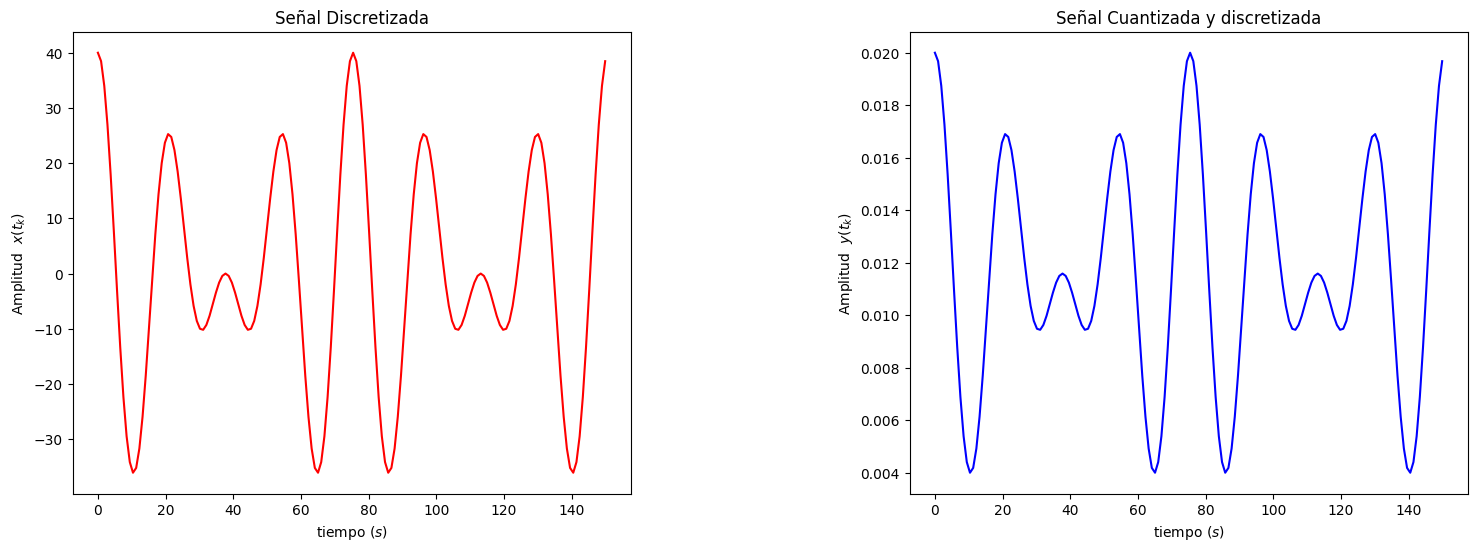

In [145]:
# Definimos puntos para maximos y minimos para desplazar la señal
y_min = 4*(10)**-3    # Entrada minima de 4mA
y_max = 20*(10)**-3   # Entrada maxima de 20mA
# Aplico la función cero y pendiente
yv = my_ceropen(xv,y_min,y_max)

# Grafica de señal disctizada
plt.figure(figsize=(18, 6))
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r')
plt.xlabel('tiempo $(s)$')
plt.ylabel('Amplitud  $x(t_k)$')
plt.title('Señal Discretizada')
# Grafica de la señal discretizada entrada analogica de 4mA a 20mA
plt.subplot(122)
plt.plot(tv,yv,'b')
plt.xlabel('tiempo $(s)$')
plt.ylabel('Amplitud  $y(t_k)$')
plt.title('Señal Cuantizada y discretizada')
plt.subplots_adjust(hspace=0.2,wspace=0.5)
plt.show()

Con la señal ubicada en la entrada analoga de $4mA$ a $20mA$ empezamos a cuantizarla y discretizarla para obtener la siguiente grafica

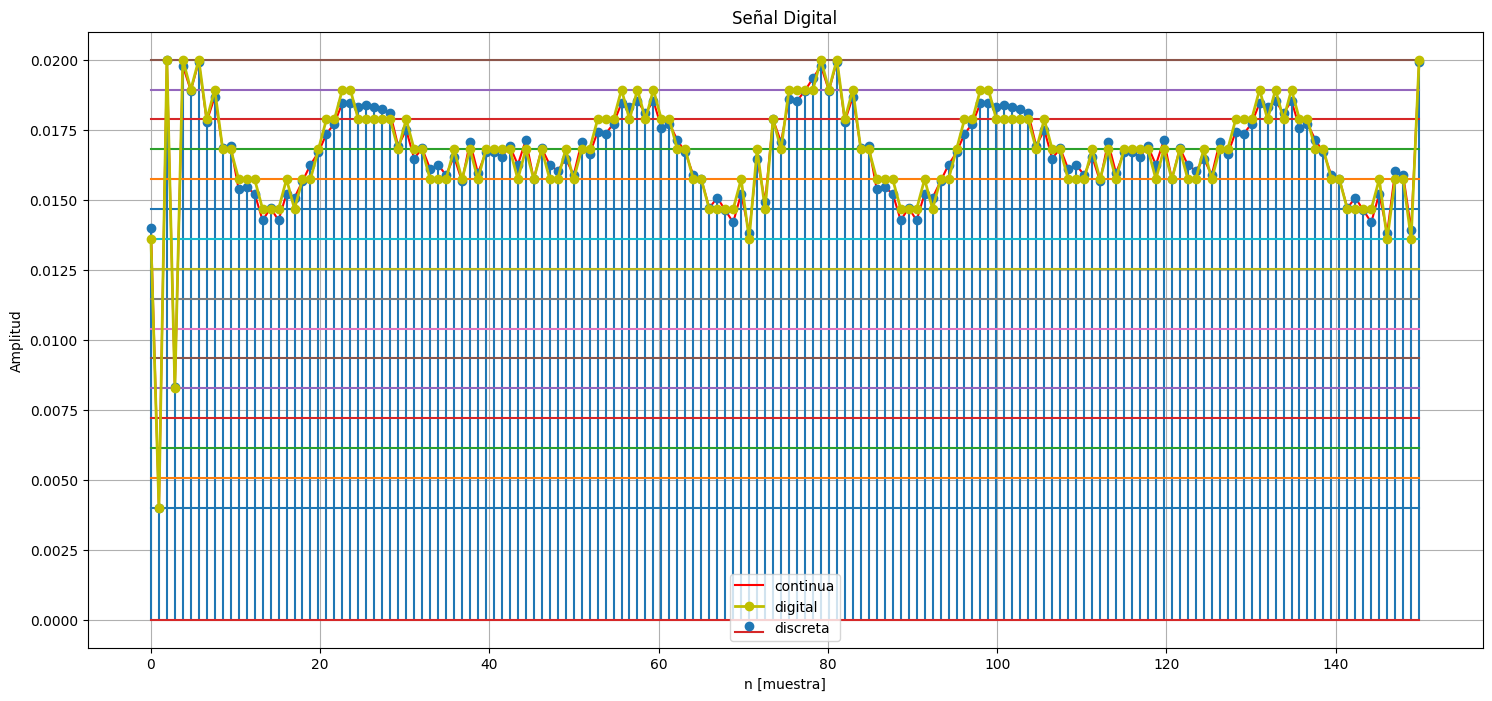

In [143]:
ycs = my_ceropen(y, y_min,y_max) # Cero y pendiente
nbits = 4
rmin = 4*(10)**-3
rmax = 20*(10)**-3
ve = np.linspace(rmin,rmax,2**nbits)   # Vector de estados a 4 bits
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1))   # Distancias y cero pendiente a vector cuantizacion ycs con vectores columna ve
ind = np.argmin(d,axis=1)                       # Se aproxima el elemento ve[j] más cercano a xv[i] (señal de entrada) para genera señal cuantizada


#función cuantización punto a punto
def my_cuantizador(yn, vq) :

  Ne = vq.shape[0]
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn)
  return vq[ind]


# recorrer vector cero y spam discretizado para cuantizar
for i in range(ycs.shape[0]):
   if i==0:
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve))


plt.figure(figsize=(18, 8))
plt.plot(tv,ycs,c='r', label='continua')#cs continua en rojo
plt.legend()
plt.stem(tv,ycs, label='discreta')#cs discreta en azul
# estados de cuantización
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# grafica señal Digital discretizada y cuantizada (Amarilla)
plt.plot(tv,yq,c='y',marker='o',label='digital', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.title('Señal Digital')
plt.show()

El siguiente grafico como dato adicional nos indica solo la señal cuantizada la cual al ingrementar unos tantos bits podremos obtener una mejor informacion de la señal

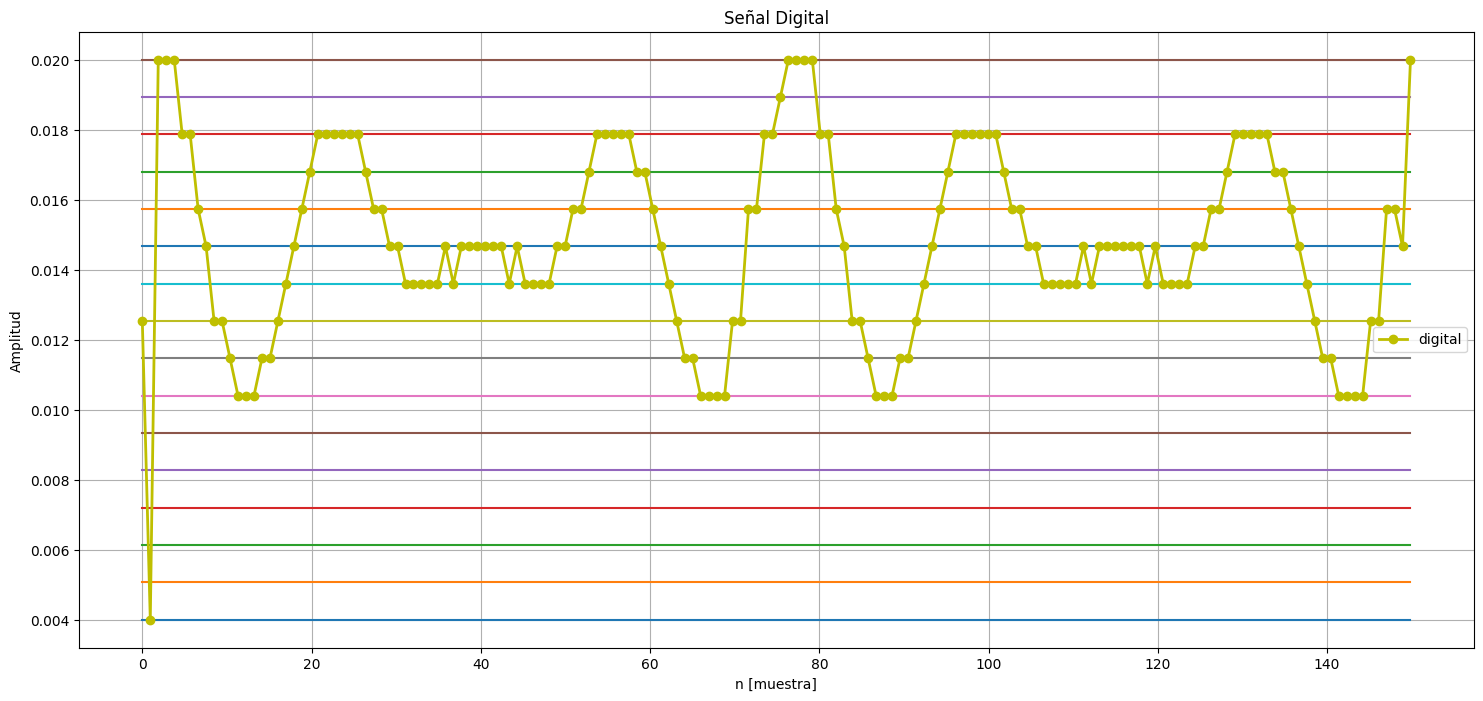

In [142]:
#estados de cuantización
plt.figure(figsize=(18, 8))
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# grafica señal Digital discretizada y cuantizada (Amarilla)
plt.plot(tv,yq,c='y',marker='o',label='digital', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.title('Señal Digital')
plt.show()

Ahora podemos encontrar la salida del sistema lineal e invariante en el tiempo  (SLIT).
* Donde nos dan la respuesta al escalón la cual si la derivamos obtenemos una respuesta al impulso (Con las proedades de $Delta$ de $Dirak$)


* Luego calculamos la convolucion de una señal de tiempo discreto $y[n]=x[n]*h[n]$ y asi encontrar la respuesta a la salida del sistema

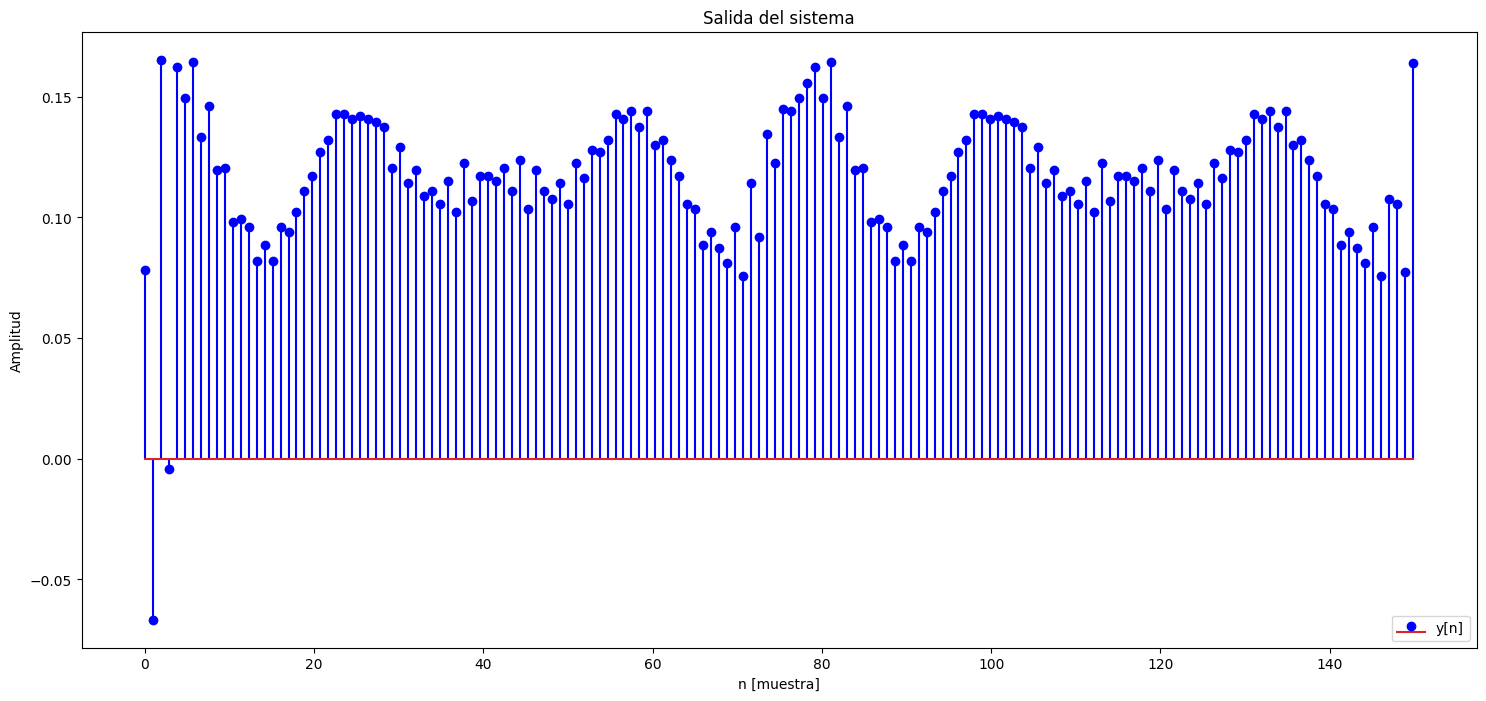

In [140]:
he = np.array([2,4,1,5,0,10]) # respuesta al escalón
h = np.diff(he)# Derivamos la respuesta al escalon para obtener respuesta al impulso (con np.diff)
y = np.convolve(yq,h,mode='same')# respuesta del slit utilizando (np.convolve)

# Señal de salida
plt.figure(figsize=(18, 8))
plt.stem(tv,y,'b',label='y[n]')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.title('Salida del sistema')
plt.show()
